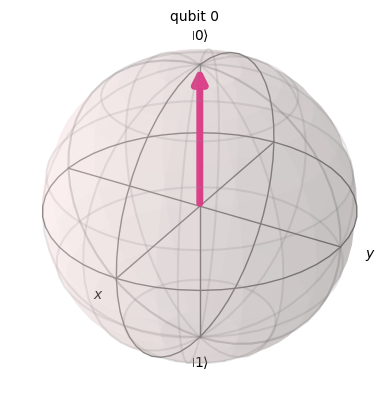

In [22]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# 양자회로 생성 및 큐비트 초기화.
qc = QuantumCircuit(1, 1)

# 큐비트 시각화.
state1 = Statevector(qc)
plot_bloch_multivector(state1)

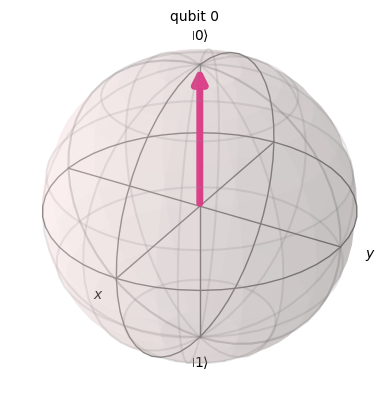

In [23]:
# 큐비트에 S 게이트 적용.
qc.s(0)

# 큐비트 시각화.
state2 = Statevector(qc)
plot_bloch_multivector(state2)

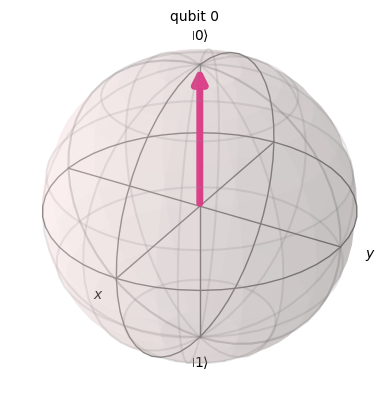

In [24]:
# S 게이트는 블로흐 구 상에서 Z축에 대한 회전을 수행하므로,
# 먼저 H 게이트를 적용해야 확인 가능.
qc2 = QuantumCircuit(1, 1)
                    
# 큐비트 시각화.
state2_1 = Statevector(qc)
plot_bloch_multivector(state2_1)

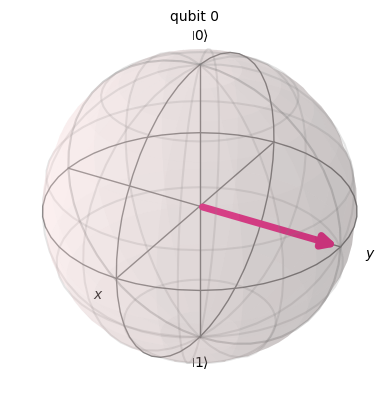

In [25]:
# H 게이트를 먼저 적용한 후 S게이트 적용.
qc2.h(0)
qc2.s(0)

# 큐비트 시각화. (π/2 만큼 Z축 회전)
state2_2 = Statevector(qc2)
plot_bloch_multivector(state2_2)

In [26]:
import os
from qiskit_ionq import IonQProvider

# IONQ 시뮬레이터 초기화.
api_key = os.getenv("IONQ_API_KEY")
provider = IonQProvider(api_key)
simulator = provider.get_backend("ionq_simulator")

# 측정.
qc2.measure(0, 0)

# 1,000,000번 실행.
job = simulator.run(qc2, shots=1000000)

# 결과 출력.
# 예상결과 = H게이트를 적용했으므로, 50%의 확률로 0 또는 1.
counts = job.get_counts()
print(counts)

{'0': np.int64(500429), '1': np.int64(499571)}


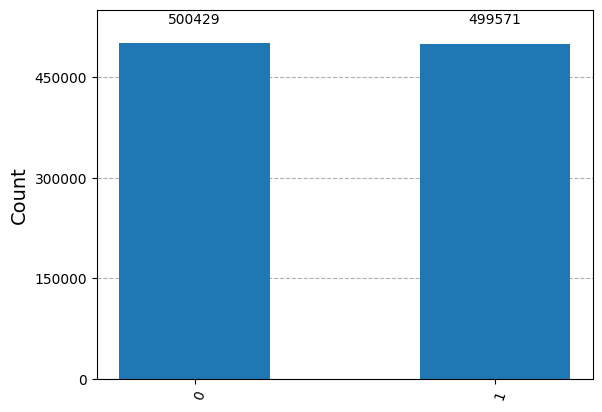

In [27]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)